In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("exchange_rate.csv")
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y %H:%M")
df.set_index('date', inplace=True)

## Part 1: Data Exploration

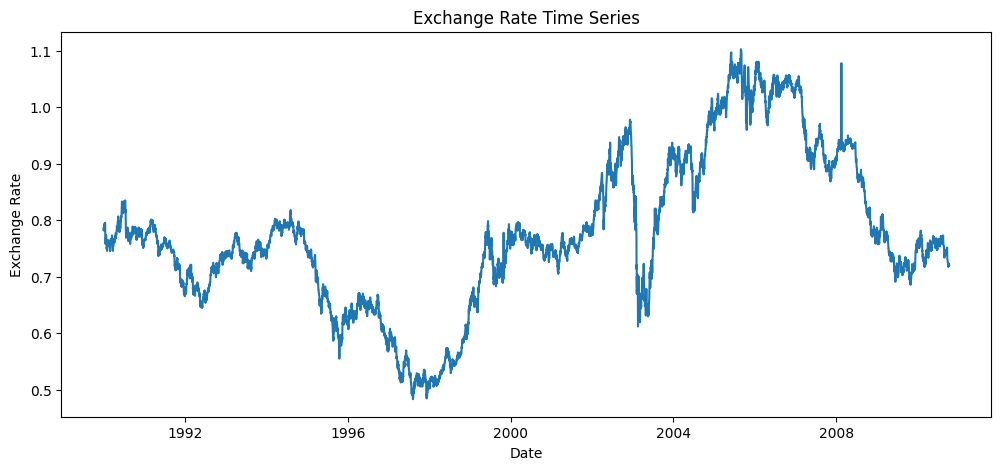

In [5]:
plt.figure(figsize=(12,5))
plt.plot(df['Ex_rate'])
plt.title("Exchange Rate Time Series")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.show()

In [6]:
df['Ex_rate'] = df['Ex_rate'].interpolate()

## Part 2: ARIMA Model

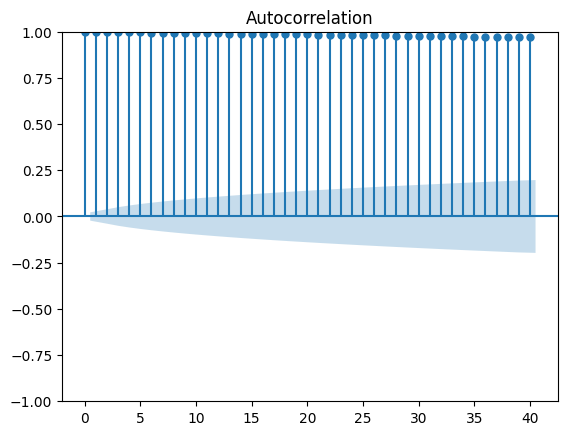

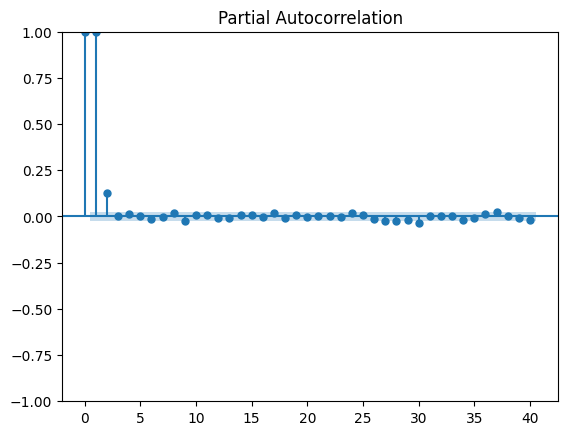

In [7]:
plot_acf(df['Ex_rate'], lags=40)
plt.show()
plot_pacf(df['Ex_rate'], lags=40)
plt.show()

In [10]:
arima_model = ARIMA(df['Ex_rate'], order=(1,1,1))
arima_result = arima_model.fit()
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 23 Aug 2025   AIC                         -56102.322
Time:                        20:50:14   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

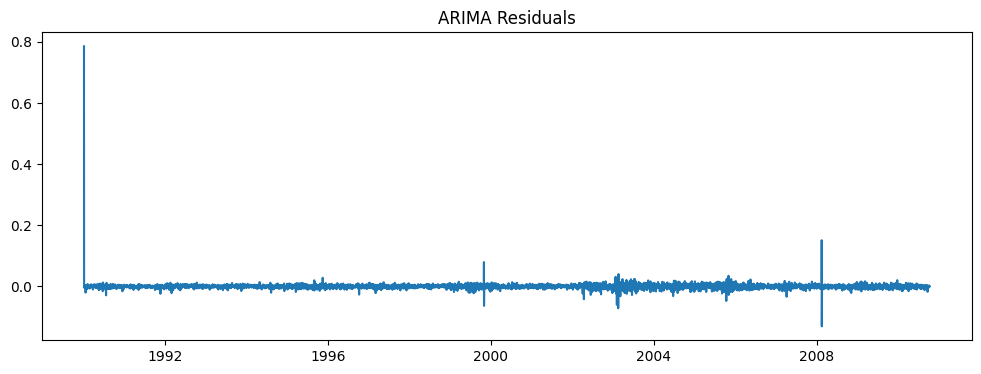

In [11]:
plt.figure(figsize=(12,4))
plt.plot(arima_result.resid)
plt.title("ARIMA Residuals")
plt.show()

In [12]:
train_size = int(len(df) * 0.8)
train, test = df['Ex_rate'][:train_size], df['Ex_rate'][train_size:]
model_arima = ARIMA(train, order=(1,1,1))
result_arima = model_arima.fit()
forecast_arima = result_arima.forecast(steps=len(test))

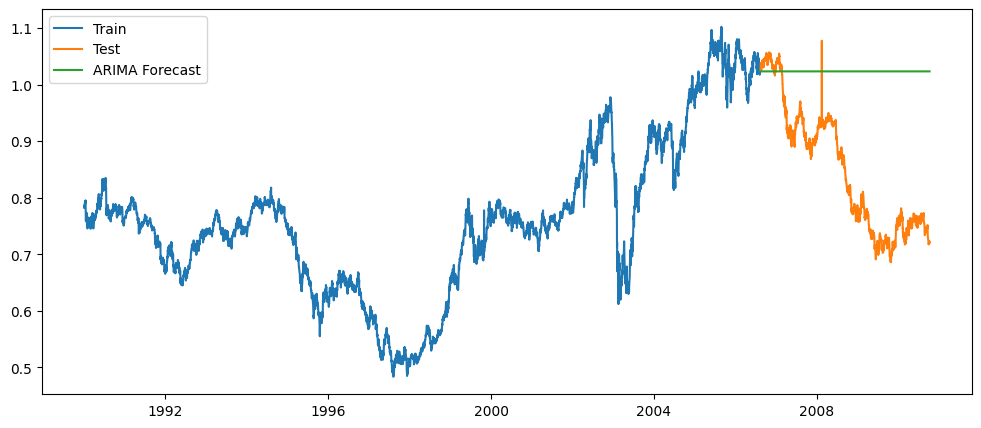

In [13]:
plt.figure(figsize=(12,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(test.index, forecast_arima, label="ARIMA Forecast")
plt.legend()
plt.show()

## Part 3: Exponential Smoothing

In [14]:
hw_model = ExponentialSmoothing(train, trend="add", seasonal=None).fit()
forecast_hw = hw_model.forecast(len(test))

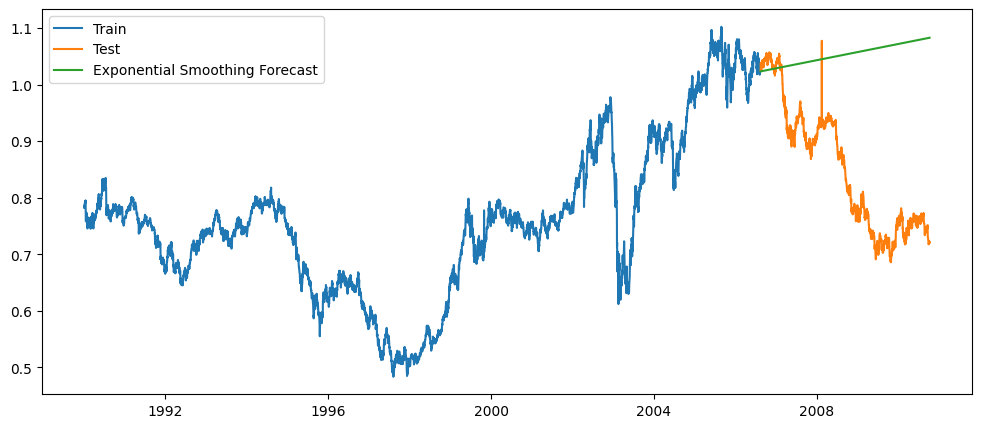

In [15]:
plt.figure(figsize=(12,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(test.index, forecast_hw, label="Exponential Smoothing Forecast")
plt.legend()
plt.show()

## Part 4: Evaluation

In [16]:
mae_arima = mean_absolute_error(test, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))
mape_arima = np.mean(np.abs((test - forecast_arima)/test))*100

In [17]:
mae_hw = mean_absolute_error(test, forecast_hw)
rmse_hw = np.sqrt(mean_squared_error(test, forecast_hw))
mape_hw = np.mean(np.abs((test - forecast_hw)/test))*100

In [19]:
print("ARIMA -> MAE:", mae_arima, "RMSE:", rmse_arima, "MAPE:", mape_arima)
print("ExpSmoothing -> MAE:", mae_hw, "RMSE:", rmse_hw, "MAPE:", mape_hw)

ARIMA -> MAE: 0.17770970449121345 RMSE: 0.2054366965966928 MAPE: 22.797966173811552
ExpSmoothing -> MAE: 0.20659618630350096 RMSE: 0.23910442598229634 MAPE: 26.50866317787391
